In [81]:
from PIL import Image

human = Image.open('./humans/model.jpg')
print(human.format, human.size, human.mode)

result_joggers = Image.open('./results/joggers.jpg')
print(result_joggers.format, result_joggers.size, result_joggers.mode)

mask_joggers = Image.open('./masks/joggers.jpg')
print(mask_joggers.format, mask_joggers.size, mask_joggers.mode)

result_sweater = Image.open('./results/sweater.jpg')
print(result_sweater.format, result_sweater.size, result_sweater.mode)

mask_sweater = Image.open('./masks/sweater.jpg')
print(mask_sweater.format, mask_sweater.size, mask_sweater.mode)

JPEG (768, 1024) RGB
JPEG (768, 1024) RGB
JPEG (768, 1024) L
JPEG (768, 1024) RGB
JPEG (768, 1024) L


In [82]:
def mask_garment(model, model_garment, vton_mask, threshold=3000):
    # compute the difference between the two images
    mask = Image.new("L", model.size)
    for x in range(model.size[0]):
        for y in range(model.size[1]):
            r1, g1, b1 = model.getpixel((x, y))
            r2, g2, b2 = model_garment.getpixel((x, y))
            if ((r2 - r1) ** 2 + (g2 - g1) ** 2 + (b2 - b1) ** 2) > threshold:
                mask.putpixel((x, y), 255)

    # intersect mask with vton mask
    for x in range(model.size[0]):
        for y in range(model.size[1]):
            if vton_mask.getpixel((x, y)) == 0:
                mask.putpixel((x, y), 0)

    return mask

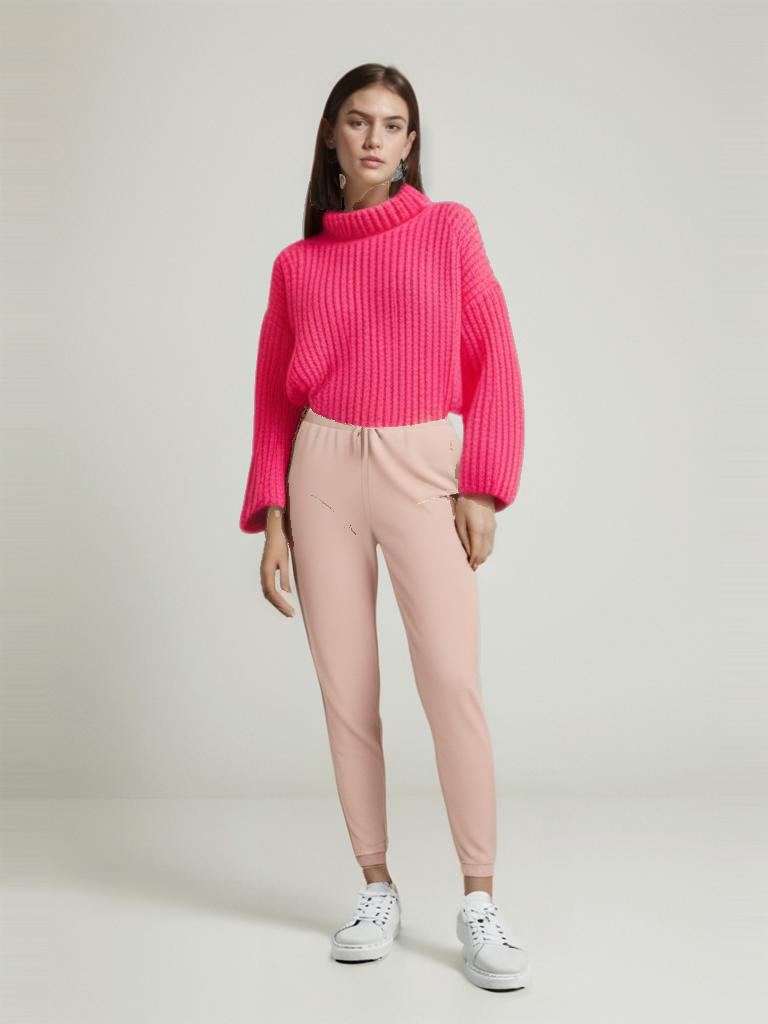

In [83]:
result = Image.new("RGBA", human.size)
mask_sweater2 = mask_garment(human, result_sweater, mask_sweater)
result.paste(result_joggers, (0, 0))
result.paste(result_sweater, (0, 0), mask_sweater2)
result